In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact



#Stats and ml libs
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer

# Settings
from sklearn import set_config
set_config(transform_output = 'pandas')
from ipywidgets import interact

In [29]:
df = pd.read_csv('Data/Energy data 1990 - 2020.csv ')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 21 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country                                                                   1364 non-null   object 
 1   Year                                                                      1364 non-null   int64  
 2   Region                                                                    1364 non-null   object 
 3   CO2 emissions from fuel combustion (MtCO2)                                1364 non-null   float64
 4   Average CO2 emission factor (tCO2/toe)                                    1364 non-null   float64
 5   CO2 intensity at constant purchasing power parities (kCO2/$15p)           1364 non-null   float64
 6   Total energy production (Mtoe)                                  

In [31]:
df

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),...,Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,...,25.395000,45.68403547,14.301991,0.095856,17.242000,13.693000,0.94,0,57.850000,0
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,...,25.435000,49.53198889,15.312995,0.102625,18.535000,14.058000,1.171,0,57.076000,0
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,...,25.459000,51.67001137,15.727010,0.103192,19.454000,15.130000,1.056,0,56.904000,0
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,...,25.463000,52.38599054,16.596984,0.105782,20.653000,15.144000,1.015,0,56.995000,0
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,...,23.971000,48.20601995,16.117004,0.102888,21.177000,15.545000,0.943,0,56.312000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,Venezuela,2016,South/Latin America,130.244135,2.214743,0.304632,169.124743,58.807791,58.377863,19.308332,...,42.060000,24.47599903,22.692979,0.137547,107.981000,73.420000,0.202,0.07223493,131.988000,0.9
1360,Venezuela,2017,South/Latin America,124.106123,2.222989,0.344218,148.976952,55.828488,58.379586,19.658549,...,36.647685,24.00755269,22.803576,0.154845,103.777449,70.153699,0.112222,0.075160838,113.220110,0.5
1361,Venezuela,2018,South/Latin America,113.249553,2.701646,0.390782,115.312748,41.918720,58.380532,20.319222,...,31.411686,23.70998143,23.828481,0.144646,99.738223,66.530345,0.044889,0.077432701,84.860873,0.2
1362,Venezuela,2019,South/Latin America,101.200206,2.793624,0.537237,81.895069,36.225425,58.377040,21.292363,...,29.023761,19.59998465,21.197943,0.192308,96.463748,64.427278,0.029469014,0.073940761,56.900109,0.29820421


In [32]:
df = df.replace('n.a.', 0)

In [33]:
df.iloc[:,[12,17,18,20]] = df.iloc[:,[12,17,18,20]].astype("float")

C:\Users\aurel\AppData\Local\Temp\ipykernel_14840\470806451.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,[12,17,18,20]] = df.iloc[:,[12,17,18,20]].astype("float")


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1364.0,2005.000000,8.947552,1990.000000,1997.000000,2005.000000,2013.000000,2020.000000
CO2 emissions from fuel combustion (MtCO2),1364.0,550.375178,1213.057599,7.597759,99.947198,221.036281,423.833152,9716.772478
Average CO2 emission factor (tCO2/toe),1364.0,2.238542,0.560594,0.412331,2.021666,2.339406,2.521811,3.516984
CO2 intensity at constant purchasing power parities (kCO2/$15p),1364.0,0.339275,0.246502,0.063650,0.194481,0.255510,0.421460,1.820894
Total energy production (Mtoe),1364.0,229.826912,400.993541,2.939712,34.720989,102.602180,217.237230,2749.046580
Total energy consumption (Mtoe),1364.0,225.967632,445.242818,2.622633,46.632538,93.825969,195.807818,3381.399262
Share of renewables in electricity production (%),1364.0,24.076995,25.490850,0.000000,6.097708,14.871924,33.281413,99.817877
Share of electricity in total final energy consumption (%),1364.0,17.622567,7.296381,0.937144,13.259106,16.869971,21.392581,50.011500
Oil products domestic consumption (Mt),1364.0,68.848847,128.339745,1.949000,12.809000,27.752179,77.500856,888.491000
Refined oil products production (Mt),1364.0,76.888589,134.644907,0.013357,15.883000,37.011757,85.048250,908.397596


In [35]:
df.select_dtypes(float).columns.tolist()

['CO2 emissions from fuel combustion (MtCO2)',
 'Average CO2 emission factor (tCO2/toe)',
 'CO2 intensity at constant purchasing power parities (kCO2/$15p)',
 'Total energy production (Mtoe)',
 'Total energy consumption (Mtoe)',
 'Share of renewables in electricity production (%)',
 'Share of electricity in total final energy consumption (%)',
 'Oil products domestic consumption (Mt)',
 'Refined oil products production (Mt)',
 'Natural gas production (bcm)',
 'Natural gas domestic consumption (bcm)',
 'Energy intensity of GDP at constant purchasing power parities (koe/$15p)',
 'Electricity production (TWh)',
 'Electricity domestic consumption (TWh)',
 'Coal and lignite domestic consumption (Mt)',
 'Share of wind and solar in electricity production (%)',
 'Crude oil production (Mt)',
 'Coal and lignite production (Mt)']

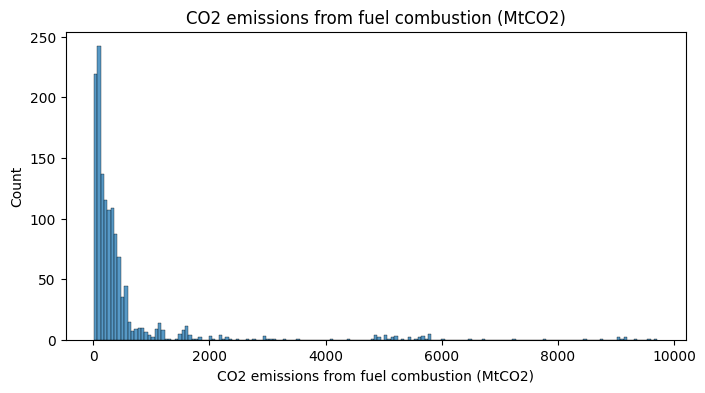

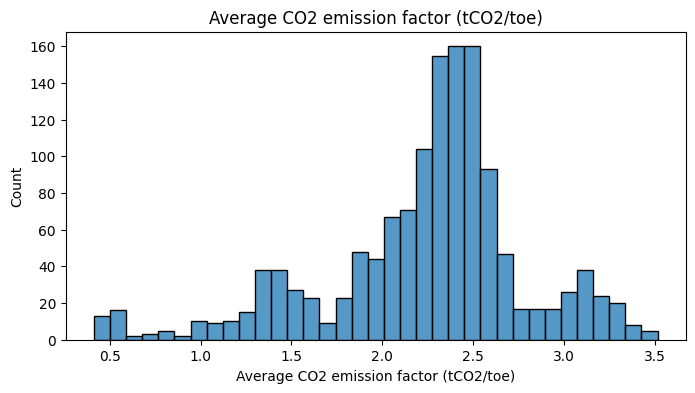

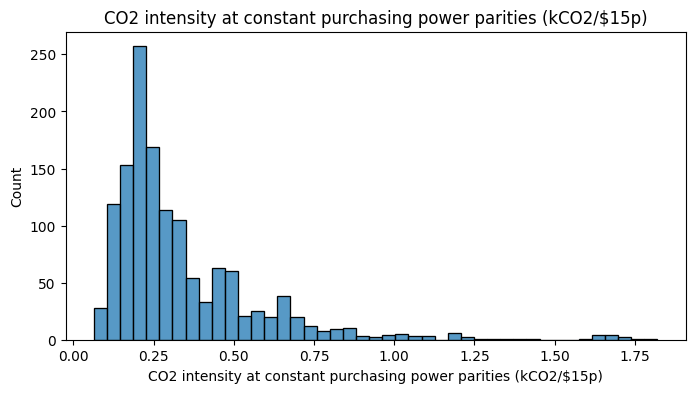

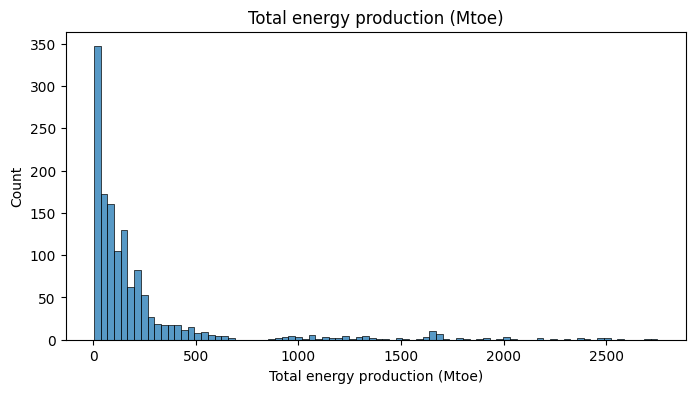

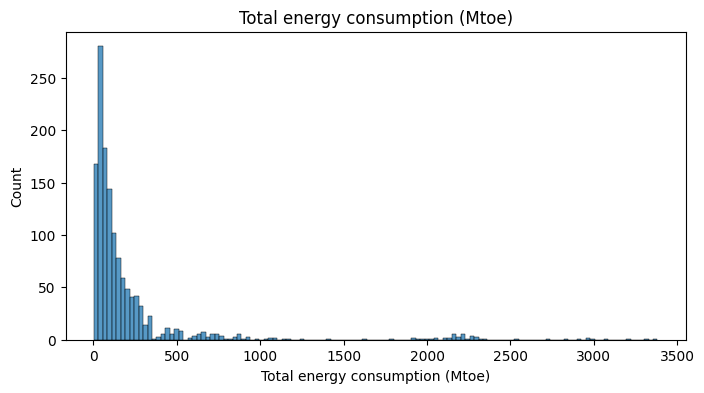

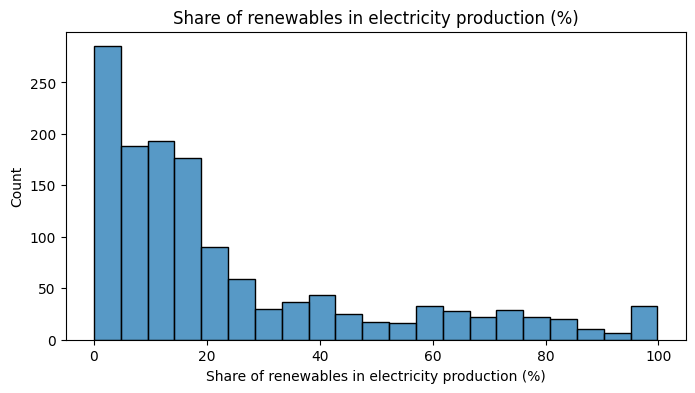

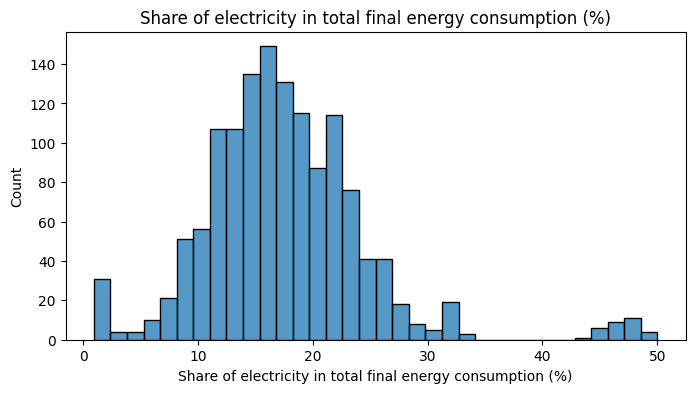

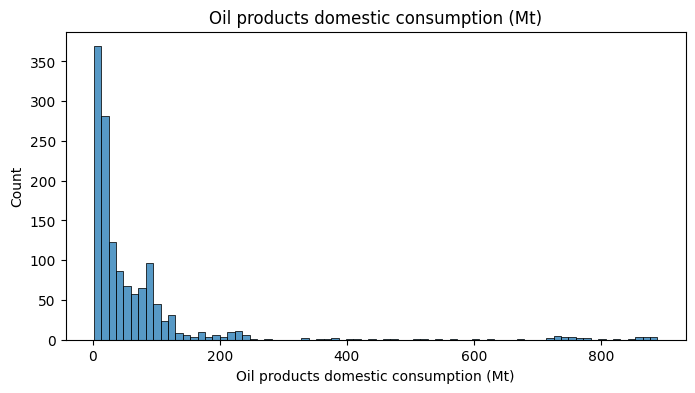

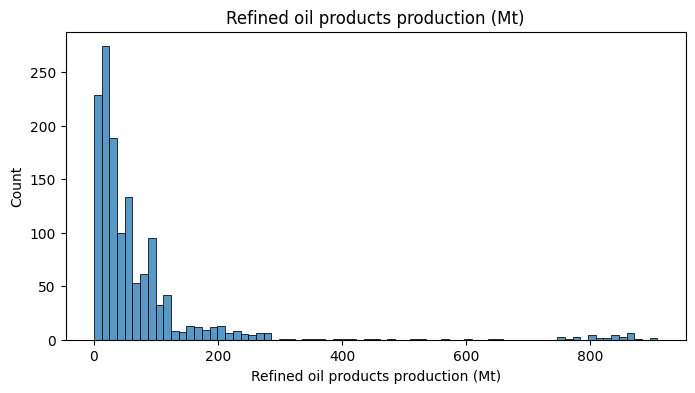

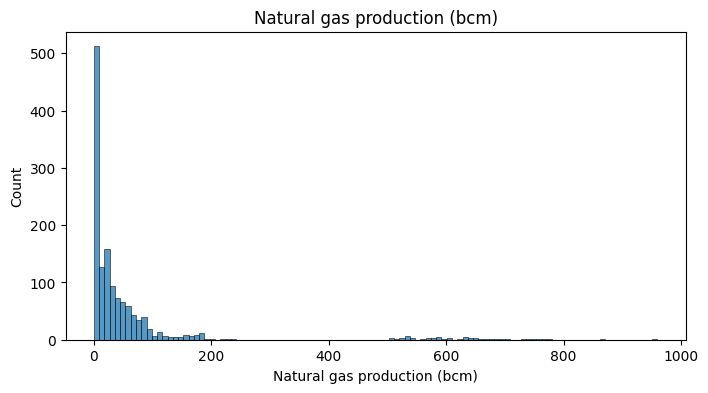

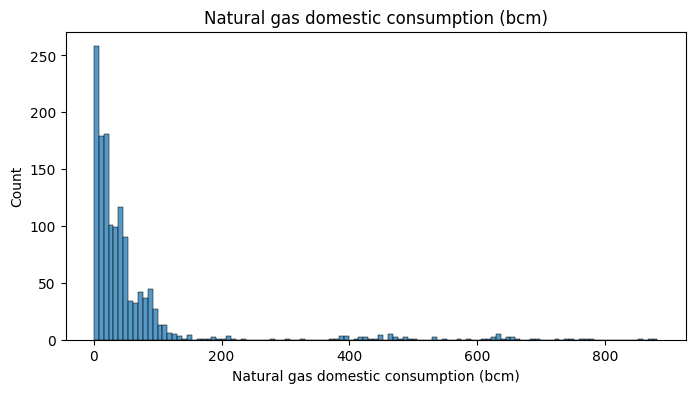

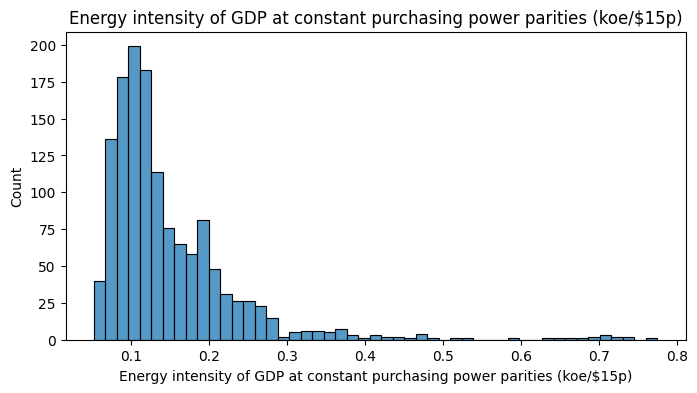

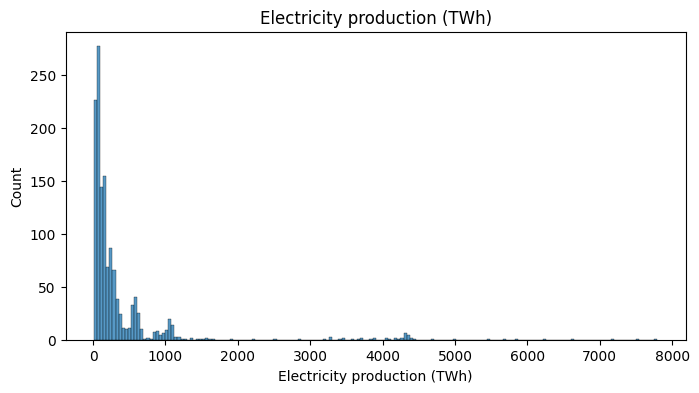

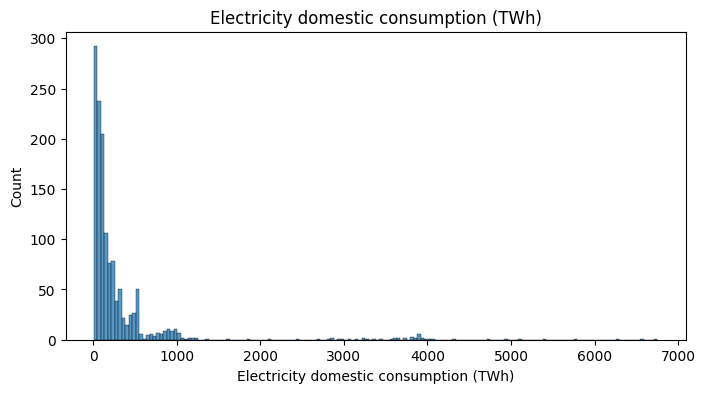

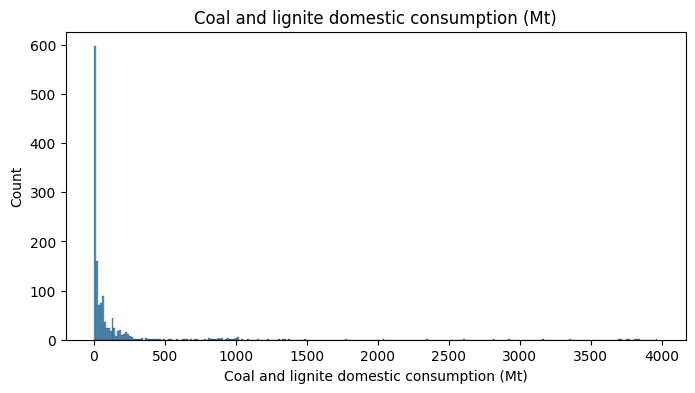

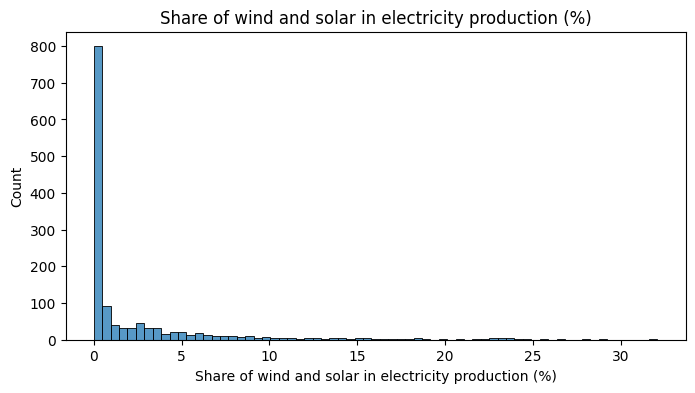

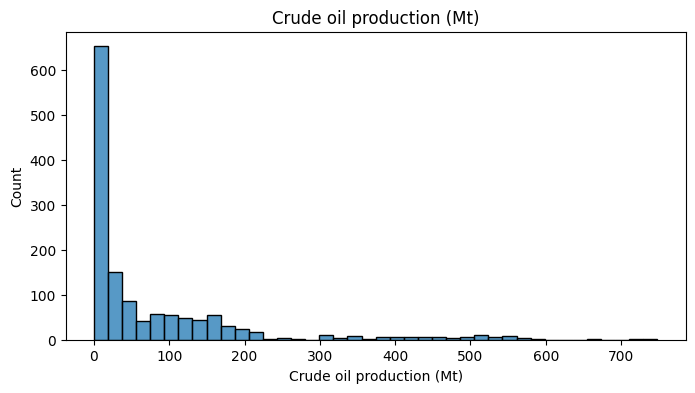

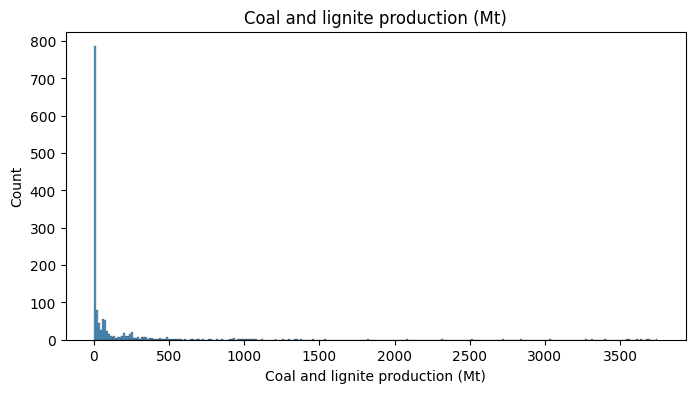

In [38]:
for i in df.select_dtypes(float).columns.tolist():
    plt.figure(figsize=(8,4))
    plt.title(f'{i}')
    sns.histplot(df.select_dtypes(float)[i])

In [39]:
preprocessing = StandardScaler()
df_scaled = pd.DataFrame(preprocessing.fit_transform(df.select_dtypes(float)), columns=df.select_dtypes(float).columns)
df_scaled.head()

,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,-0.410183,0.266446,-0.447972,-0.323601,-0.457850,-0.914154,-1.267665,-0.473673,-0.382580,-0.097657,-0.387780,-0.579934,-0.444969,-0.438597,-0.308773,-0.500383,-0.136087,-0.320797
1,-0.406746,0.350622,-0.362727,-0.317430,-0.454970,-0.882844,-1.320017,-0.470789,-0.382283,-0.068299,-0.379165,-0.505109,-0.443420,-0.438099,-0.308225,-0.500383,-0.142558,-0.320797
2,-0.406653,0.258704,-0.378699,-0.313389,-0.453724,-0.904737,-1.252107,-0.471577,-0.382105,-0.051986,-0.375637,-0.498845,-0.442319,-0.436635,-0.308498,-0.500383,-0.143996,-0.320797
3,-0.405056,0.386861,-0.322812,-0.311586,-0.453531,-0.877805,-1.279396,-0.471257,-0.382075,-0.046524,-0.368224,-0.470213,-0.440882,-0.436616,-0.308595,-0.500383,-0.143235,-0.320797
4,-0.407407,0.332103,-0.364459,-0.322354,-0.455487,-0.914119,-1.158802,-0.477711,-0.393160,-0.078415,-0.372314,-0.502199,-0.440254,-0.436069,-0.308766,-0.500383,-0.148945,-0.320797


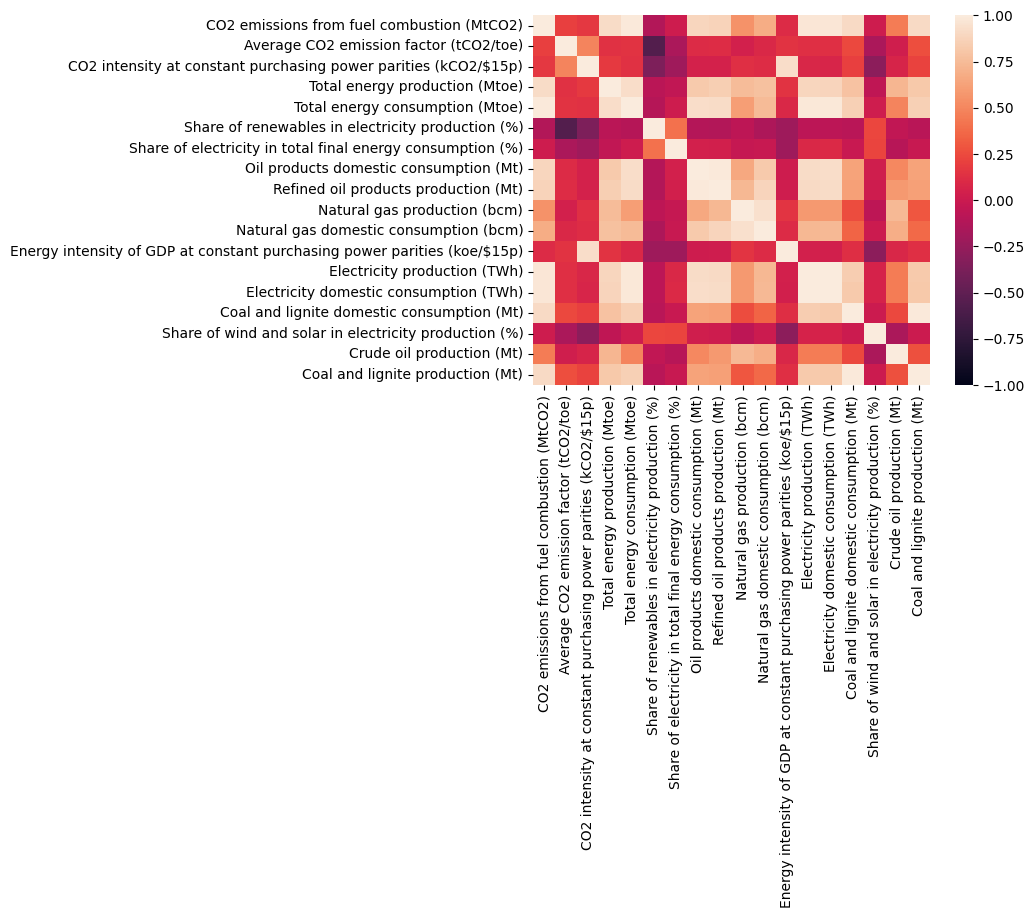

In [47]:
sns.heatmap(df_scaled.corr(), vmin=-1,vmax=1);

In [49]:
# Calculate bartlett sphericity and save p_values
p_value = calculate_bartlett_sphericity(df_scaled)[1]


# print test results 
print(F'p_value: {p_value}')

p_value: 0.0


In [50]:
# Calculate KMO and save results
kmo_value = calculate_kmo(df_scaled)[1]

# print results
print(f'KMO: {kmo_value}')

KMO: 0.6240489350340283


c:\Users\aurel\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


[9.39883960e+00 2.67530037e+00 1.80101414e+00 1.20703098e+00
 9.23211454e-01 7.71473457e-01 5.73066063e-01 3.33043406e-01
 2.16268874e-01 5.08539329e-02 1.86125071e-02 1.18745405e-02
 8.34619485e-03 6.51926787e-03 3.04246054e-03 1.05544996e-03
 3.23601349e-04 1.23705338e-04]


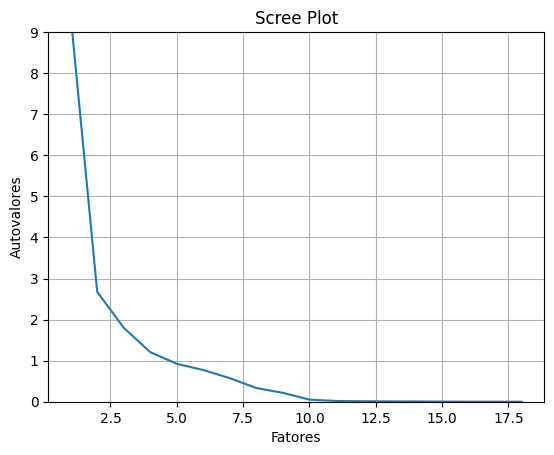

In [58]:
# training model
model = FactorAnalyzer(rotation = None)
model.fit(df_scaled)

# get eigenvalues for evaluate n factors
ev, v = model.get_eigenvalues()

# Showing result in lineplot
print(ev)
sns.lineplot(x=range(1, df_scaled.shape[1]+1), y=ev)
plt.title('Scree Plot')
plt.ylim(0,9)
plt.xlabel('Fatores')
plt.ylabel('Autovalores')
plt.grid()
plt.show()

In [99]:
# criando um objeto para fazer análise fatorial com 4 fatores
model = FactorAnalyzer(n_factors=4, rotation=None)

# aplicando a análise fatorial aos dados
model.fit(df_scaled)

# criando nome para as colunas do DataFrame de cargas fatoriais
colunas = []
for i in range(4):
  colunas.append('Fator ' + str(i+1))

# criando DataFrame para auxiliar a visualização do resultado
variancia_fator = pd.DataFrame(model.get_factor_variance(),
                               index=['Variância','Variância Proporcional','Variância Acumulada'],
                               columns=colunas)

variancia_fator

,Fator 1,Fator 2,Fator 3,Fator 4
Variância,9.328600,2.444490,1.642495,1.034083
Variância Proporcional,0.518256,0.135805,0.091250,0.057449
Variância Acumulada,0.518256,0.654061,0.745310,0.802759


In [80]:
# Create a list with all rotation tips
rotation = ['varimax',
            'promax', 
            'oblimin',
            'oblimax',
            'quartimin',
            'quartimax',
            'equamax',
            None]

# create interactive plot to avalliate all rotation
@interact(changed = rotation)
def model(changed):
    model = pd.DataFrame(FactorAnalyzer(n_factors=5, rotation = changed)\
                                       .fit(df_scaled)\
                                       .loadings_,
                         index=df_scaled.columns,
                         columns=colunas)
    
    # create a dict to save values above 0.5
    fatores_variaveis = {}

    # filling in the dict
    for i in range(5):
      fatores_variaveis['Fator ' + str(i+1)] = model[abs(model.iloc[:,i]) > 0.5].iloc[:,i].index.tolist()    

    #Show plot and values dict
    return sns.heatmap(model,vmin=-1, vmax=1, annot=True), fatores_variaveis

interactive(children=(Dropdown(description='changed', options=('varimax', 'promax', 'oblimin', 'oblimax', 'qua…

In [100]:
# Training model
model = FactorAnalyzer(n_factors=4, rotation = 'varimax')
model.fit(df_scaled)

# save results in dataframe
cargas_fat = pd.DataFrame(model.loadings_,
                          index=df_scaled.columns,
                          columns=colunas)

fatores_variaveis = {}
# preenchendo o dicionário
for i in range(4):
  fatores_variaveis['Fator ' + str(i+1)] = cargas_fat[abs(cargas_fat.iloc[:,i]) > 0.5].iloc[:,i].index.tolist()  

fatores_variaveis  

{'Fator 1': ['CO2 emissions from fuel combustion (MtCO2)',
  'Total energy production (Mtoe)',
  'Total energy consumption (Mtoe)',
  'Oil products domestic consumption (Mt)',
  'Refined oil products production (Mt)',
  'Electricity production (TWh)',
  'Electricity domestic consumption (TWh)',
  'Coal and lignite domestic consumption (Mt)',
  'Coal and lignite production (Mt)'],
 'Fator 2': ['Total energy production (Mtoe)',
  'Oil products domestic consumption (Mt)',
  'Refined oil products production (Mt)',
  'Natural gas production (bcm)',
  'Natural gas domestic consumption (bcm)',
  'Crude oil production (Mt)'],
 'Fator 3': ['CO2 intensity at constant purchasing power parities (kCO2/$15p)',
  'Energy intensity of GDP at constant purchasing power parities (koe/$15p)'],
 'Fator 4': ['Average CO2 emission factor (tCO2/toe)',
  'Share of renewables in electricity production (%)']}

In [83]:
import numpy as np

In [101]:
# Calculate racking results
weights = model.loadings_
matriz_df = np.asmatrix(df_scaled)
matriz_peso = np.asmatrix(weights)
mult_matriz = np.round(matriz_df * matriz_peso, 4)
variancia = model.get_factor_variance()[1]
resultado = np.round(mult_matriz * variancia, 4)

resultado

array([[-1.1981, -0.4838, -0.0547, -0.1145],
       [-1.1797, -0.4743, -0.0362, -0.121 ],
       [-1.1816, -0.4684, -0.0399, -0.1158],
       ...,
       [-0.965 , -0.449 ,  0.029 ,  0.0865],
       [-0.9731, -0.5156,  0.1365,  0.0601],
       [-1.0007, -0.5918,  0.1725,  0.0609]])

In [106]:
# Create a copy dataframe with column factor rank
top = df.assign(Rancking_fator_1 = resultado[:,3].tolist())\
               .sort_values(by = 'Rancking_fator_1', ascending = False)

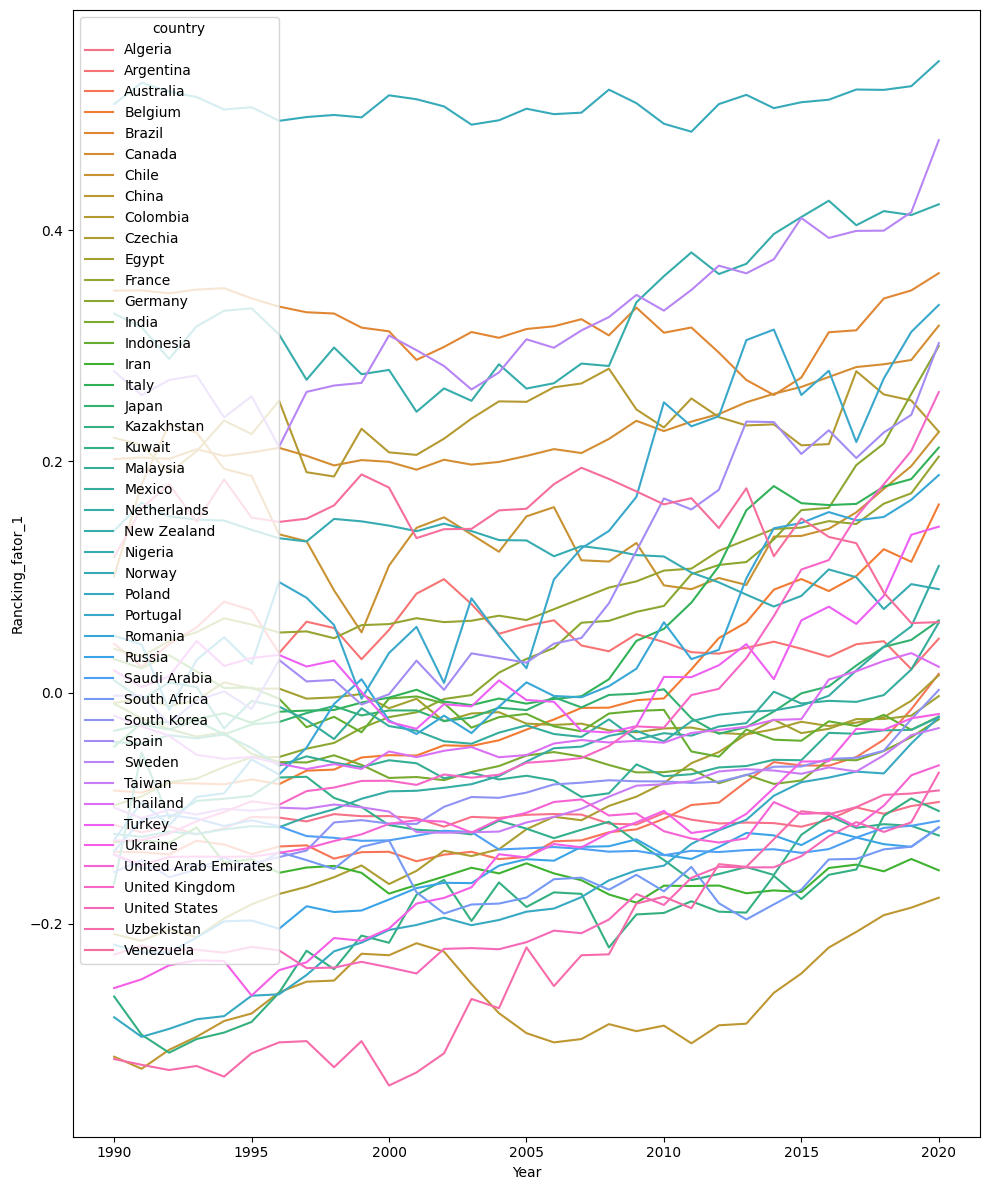

In [129]:
plt.figure(figsize=(10,12))
sns.lineplot(x = top.sort_values(by = "Year").Year,
             y = top.sort_values(by = "Year").Rancking_fator_1,
             hue = top.country)
plt.tight_layout()

In [117]:
top[top.Year == 2020].sort_values(by = "Rancking_fator_1",ascending = False)

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),...,Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt),Rancking_fator_1
805,Norway,2020,Europe,34.922626,1.289325,0.111903,210.463916,27.085983,98.370864,48.229040,...,115.930712,6.134857,0.086792,154.298906,123.399546,1.156952,6.416402,94.632688,0.070429,0.5462
1084,Sweden,2020,Europe,32.202289,0.687893,0.063650,32.866519,46.812930,68.402781,32.741917,...,0.000000,1.253523,0.092529,163.683735,123.469907,2.688658,17.300287,0.004000,0.535000,0.4779
743,New Zealand,2020,Asia & Pacific,30.004304,1.443832,0.170301,15.199733,20.781018,80.029880,23.452916,...,4.651159,4.880874,0.117951,44.150344,38.929245,2.812770,23.911626,1.118214,2.825488,0.4224
154,Brazil,2020,South/Latin America,385.437089,1.346575,0.133174,323.986810,286.235053,84.100645,19.137049,...,23.848249,33.084967,0.098898,613.976948,529.505630,22.545434,10.604280,155.979111,5.549466,0.3628
867,Portugal,2020,Europe,38.905380,1.943812,0.123974,6.149069,20.014993,59.700641,24.434017,...,0.000000,5.966755,0.063779,53.099291,45.991310,0.960875,26.803742,0.066626,0.147000,0.3353
185,Canada,2020,North America,515.568757,1.016767,0.175872,504.330409,280.811306,67.723030,24.033735,...,172.011896,117.158460,0.172972,648.359205,555.840201,27.853054,6.527577,254.996538,45.226108,0.3174
1053,Spain,2020,Europe,191.127166,1.788192,0.119693,33.746361,106.882927,43.915443,25.310211,...,0.052246,31.821166,0.066935,264.122645,227.849305,3.826859,29.115080,0.027539,2.401000,0.3023
402,Germany,2020,Europe,616.991519,1.536436,0.107295,95.502254,275.473091,44.532622,18.754419,...,5.580168,92.605369,0.069834,572.488509,489.015630,138.406729,32.093219,3.238802,104.595682,0.2998
1270,United Kingdom,2020,Europe,304.223407,1.969619,0.114164,116.749567,154.458006,43.737475,20.895982,...,39.592291,72.941872,0.057962,313.367838,286.021178,8.248658,28.254583,48.163914,1.570234,0.2599
278,Colombia,2020,South/Latin America,75.210027,1.941158,0.110683,104.419850,38.744930,64.763118,20.867144,...,13.729144,11.586972,0.057019,76.270870,72.777481,7.724358,0.242043,43.111755,64.627901,0.2257


In [112]:
top.groupby("country")[['Rancking_fator_1']].min().reset_index().sort_values(by = "Rancking_fator_1",ascending = False)

,country,Rancking_fator_1
25,Norway,0.4852
4,Brazil,0.2574
23,New Zealand,0.2429
34,Sweden,0.2126
5,Canada,0.1928
8,Colombia,0.1869
24,Nigeria,0.0722
43,Venezuela,0.0601
6,Chile,0.0521
11,France,0.0312
